# pbskids
In this dataset, you are provided with game analytics for the PBS KIDS Measure Up! app. 

Each assessment is designed to test a child's comprehension of a certain set of measurement-related skills.
### *There are five assessments*
- Bird Measurer
- Cart Balancer
- Cauldron Filler
- Chest Sorter
- Mushroom Sorter.

## Goal

***Forecast how many attempts a child will take to pass a given assessment(an incorrect answer is counted as an attempt).***

Each set:
- Training set
    - you are provided the full history of gameplay data. 
- Test set
    - we have truncated the history after the start event of a single assessment, chosen randomly, **for which you must predict the number of attempts.**

## train.csv & test.csv
These are the main data files which contain the gameplay events.

### event_id 
- Randomly generated unique identifier for the event type. Maps to event_id column in specs table.
- **specific to the title or game**.
    - For example, 
    - **the eventids 6043a2b4 (All star sorting) and d3640339 (Dino dive) represent the same eventcode 4090(player clicks help button) but belong to different games thus have different event_id**
    
### event_count
- **Incremental counter** of events within a game session (offset at 1). Extracted from event_data.
    - There are some rows which have same set of **evenid** and **installid**,
        - The *timestamp* is later , The more *event_count*
        

### event_code
- Identifier of the event 'class'. Unique per game, but may be duplicated across games. E.g...
    - Start of the title(game/activity/clip/assessment) is always recorded with event_code 2000.
- **An event_code can be thought of as a category, **
- Assessment attempts(with their outcome - correct or incorrect) are captured in eventcode 4100 for all assessments except for Bird measurer which has the event_code 4110. 



### game_session
- Randomly generated unique identifier grouping events within a single game or video play session.

### timestamp
- Client-generated datetime
- Event occured.
    - Maybe, timestamp col contains some timezone.
        - because, It doesn't sound realistic that kids play game in midneight(AM2~)
        
    
### event_data
- Semi-structured JSON formatted string containing the events parameters. Default fields are: 
    - event_count
    - event_code
    - game_time
    - otherwise fields are determined by the event type.
 
- The system records **all the actions (both Janet's as well as the system response) as events**.
    - For example, the events could be the following: she ...   
        - presses the play button
            - Ex. the x,y co-ordinates of the click is also noted. 
        - drags the dinosaurs, 
        - places the dinosaurs in the right home, 
- the system gives instructions, feedback if her **action** is correct or not.
- event_data captures detailed information based on the event. 
    - Each of these **events** have a corresponding **event_id** and **event_code**.

### installation_id
- Randomly generated unique identifier grouping game sessions within a single installed application instance.
- Each application install is represented by an installation_id. **This will typically correspond to one child, **
    - but you should expect noise from issues such as shared devices. 
    - **Joe (Janet's little brother) also shares the same Ipad, and often plays the game.**
- train: contains many installation_ids which never took assessments, 
- test : every installation_id made an attempt on at least **one assessment.**

### game_time
- Time in milliseconds since the start of the game session. Extracted from event_data.

### title
- Title of the game or video.
- There are multiple media **title** belonging to the different types. 

### type
- Media type of the game or video. Possible values are:
    - Exposure(video clip)   
        - Videos are intended to expose the kid to a topic or a problem solving approach. 
            - Videos typically model or explain things. 
            - There is no interactive component to videos. 
        - Clips can further be classified into:
            - Interstitials: 
                - short transitional videos between worlds or sections of the world
                    e.g. 'Crystal Caves - Level 1'). These videos merely hint to the subject matter.
            - Longer clips (2-3 minutes in length):
                - these videos explain an important subject or approach with the help of familiar characters from the PBS KIDS world. 
                - Typically these videos have been excerpted from longer television episodes.
        - Keep in mind in the dataset only the start of the video playback is captured. 
            - Therefore there are far fewer events corresponding to clips than there are to games or assessments. 
            - That does not mean clips are 
                - less popular
                - lack of interactivity not withstanding, 
            - there is good evidence that video contributes significantly to learning outcomes:D
    - Exploration(activity)
        - open-ended mini-games that allow kids to practice their skills in an environment that mimics real life play patterns to support “messing about”. 
        - Activities do not have a defined goal, but they do typically model cause and effect. 
        - We sometimes refer to Activities as 'sandboxes' or 'toys'.
    - Practice(game)
        - goal : solving a specific problem. 
        - Each challenge may belong to a progressively more challenging round (marked in the data), and multiple rounds may be grouped into levels. 
        - Games do not end until the player finishes the game or decides to exit the play session.
        - If a final goal is achieved, there is usually an option to replay the entire game from the start.

    - Demonstration(assessment).
        - Assessments are interactives that are designed specifically with the goal of measuring a player’s knowledge of the subject matter. 
        - Metrics : the number of incorrect answers leading to the assessment solution

- Each of the worlds in the app may have one or more such sequences of media objects, 
    - In normal, user should follow above order
        - However, kids are not required to follow the path that is laid out for them, 
    - sometimes the app does not follow this exact formula. 

- There are multiple media **title** belonging to the different types. 
    - For example, within the 'Treetop city' there are 
        - All star sorting(Game) 
        - Treasure map(Clip)
        - Fireworks(Activity) 
        - amongst others.
- games/assessments might have multiple rounds/levels.
    - **The level of difficulty is the same for everyone, 

### world
- The section of the application the game or video belongs to. 
- Helpful to identify the educational curriculum goals of the media. Possible values are:
    - NONE (at the app's start screen)
    - TREETOPCITY (Length/Height)
    - MAGMAPEAK (Capacity/Displacement)
    - CRYSTALCAVES (Weight)

## specs.csv
This file gives the specification of the various event types.

### event_id
- Global unique identifier for the event type. Joins to event_id column in events table.
### info
- Description of the event.

### args
- JSON formatted string of event arguments. Each argument contains:

### name
- Argument name.

### type
- Type of the argument (string, int, number, object, array).

### info
- Description of the argument.

## df_train_labels

show how these groups would be computed on the assessments in the training set. 
### (dependency) 
- num_correct/(num_correct + num_incorrect) = accuracy
### accuracy_group(Goal)
- 3: the assessment was solved on the first attempt
- 2: the assessment was solved on the second attempt
- 1: the assessment was solved after 3 or more attempts
- 0: the assessment was never solved


# Refer to
- *https://www.kaggle.com/c/data-science-bowl-2019/discussion/117019#latest-671781*
- *https://www.kaggle.com/c/data-science-bowl-2019/discussion/115034#latest-675608*
- *https://www.kaggle.com/c/data-science-bowl-2019/discussion/115585#latest-679819*
- *https://www.kaggle.com/shahules/xgboost-feature-selection-dsbowl*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display,HTML,Image, display_png
import pickle
import re
from itertools import zip_longest
from collections import Counter
import datetime
from datetime import datetime as dt
import copy
from functools import reduce
from tqdm import tqdm_notebook as tqdm
import os
import multiprocessing
import json
import time
from tqdm import tqdm
from pandas import Panel

## Set up 

In [2]:
N_CORE = multiprocessing.cpu_count()
tqdm.pandas()

In [3]:
df_train = pd.read_csv('../source/train.csv.zip')
df_train_labels = pd.read_csv('../source/train_labels.csv.zip')
df_specs = pd.read_csv('../source/specs.csv')

In [76]:
df_test = pd.read_csv('../source/test.csv.zip')

In [4]:
df_train.head(3)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [5]:
df_train_labels.head(3)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3


In [6]:
df_specs.head(3)

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [77]:
df_test.head(3)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK


# Clean data
## df_train_labels

In [7]:
#almost same 
df_train_labels.loc[df_train_labels.accuracy != (df_train_labels.num_correct.astype(float) / (df_train_labels.num_correct + df_train_labels.num_incorrect) )].head(10)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
23,cace4c493ac347e3,002db7e3,Bird Measurer (Assessment),1,10,0.090909,1
82,7e02851957b1e0df,00fc65b6,Chest Sorter (Assessment),1,10,0.090909,1
681,2170a71b0a17a8b1,08987c08,Cauldron Filler (Assessment),1,14,0.066667,1
701,4b56d80d68ebf4f6,08987c08,Cauldron Filler (Assessment),1,14,0.066667,1
743,8c8d5067b69f86c8,08987c08,Mushroom Sorter (Assessment),1,10,0.090909,1
813,fd27f7c1de0a63a8,08987c08,Cauldron Filler (Assessment),1,23,0.041667,1
1270,de0d1bd6d696eeb8,1091d87b,Bird Measurer (Assessment),1,10,0.090909,1
2071,9ec1bcd36a0a00fe,1b142503,Chest Sorter (Assessment),1,10,0.090909,1
2522,472ed774445f5492,1f71eb61,Mushroom Sorter (Assessment),1,10,0.090909,1
3177,3016d752926830b4,2ac9d9d3,Chest Sorter (Assessment),1,10,0.090909,1



### There are idx which does not contain in list of train_label 

In [8]:

set_session_instid_train = set(df_train[df_train.type == 'Assessment'].game_session + df_train[df_train.type == 'Assessment'].installation_id) 
# set_session_instid_train_valid = set(df_train_not_start[df_train_not_start.type == 'Assessment'].game_session + df_train_not_start[df_train_not_start.type == 'Assessment'].installation_id) 
set_session_instid_label = set(df_train_labels.game_session+df_train_labels.installation_id)
print(len(set_session_instid_train))
# print(len(set_session_instid_train_valid))
print(len(set_session_instid_label) )

21239
17690


In [9]:

ls_game_session_non_taget = list(set(df_train.game_session)-set(df_train_labels.game_session))

## df_train

In [10]:
# Check type
df_train.dtypes

event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count         int64
event_code          int64
game_time           int64
title              object
type               object
world              object
dtype: object

In [11]:
# Check type
df_train.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [81]:
for _col in df_train.columns:
    
    print(_col+' ',end="")
    if df_train[_col].dtype=='object' :
        print(df_train[_col].value_counts())
    print(" ")

event_id 1325467d    274673
bb3e370b    256179
cf82af56    224694
5e812b27    206129
cfbd47c8    199734
90efca10    185211
27253bdc    183676
76babcde    182235
b2dba42b    169921
1bb5fbdb    168344
884228c8    161890
6c517a88    160593
7372e1a5    158917
56bcd38d    151200
0330ab6a    147592
2230fab4    146249
0a08139c    145510
71fe8f75    144797
4ef8cdd3    131972
7dfe6d8a    128368
67439901    127457
5c3d2b2f    126738
df4940d3    126255
587b5989    118442
5e3ea25a    114708
f71c4741    113304
f7e47413    111442
02a42007    109098
5154fc30    108199
9ee1c98c    107498
             ...  
6aeafed4       219
5f5b2617       173
eb2c19cd       155
05ad839b       132
4e5fc6f5       120
16667cc5       102
26a5a3dd        97
30df3273        72
bfc77bd6        67
7fd1ac25        43
3a4be871        33
13f56524        26
01ca3a3c        25
2ec694de        24
29a42aea        14
9554a50b        13
ecc6157f        12
6077cc36        11
e4d32835        10
ab4ec3a4         5
0ce40006         4
611

##  Concat train + train_label

In [ ]:
df_train

### Convert Columns
#### *timestamp*
- Convert dtype to use easily

In [14]:
df_train.timestamp = pd.to_datetime(df_train.timestamp,format='%Y-%m-%dT%H:%M:%S.%f')

In [15]:
df_train['month']      = df_train.timestamp.dt.month
df_train['hour']       = df_train.timestamp.dt.hour
df_train['year']       = df_train.timestamp.dt.year
df_train['dayofweek']  = df_train.timestamp.dt.dayofweek
df_train['weekofyear'] = df_train.timestamp.dt.weekofyear

In [16]:
ls_col_time = ['timestamp','month','hour','year','dayofweek','weekofyear']

### Add and Convert Columns
#### *Assessment attempts* & *IsAssessmentCorrect*

Admin says..
- The file train_labels.csv has been provided to show how these groups would be computed on the assessments in the training set. 
- Assessment attempts are captured in event_code 4100 for all assessments except for Bird Measurer, which uses event_code 4110. 
- If the attempt was correct, it contains "correct":true.

*https://www.kaggle.com/artgor/oop-approach-to-fe-and-models*

In [17]:

df_train['AssessmentAttempt'] = 0
df_train.loc[(df_train.title =='Bird Measurer (Assessment)')&(df_train.event_code==4110),'AssessmentAttempt'] = 1
df_train.loc[(df_train.type  =='Assessment') & (df_train.title != 'Bird Measurer (Assessment)') & (df_train.event_code == 4100), 'AssessmentAttempt'] = 1

In [18]:

df_train['IsAssessmentCorrect'] = None
df_train.loc[(df_train.event_data.str.contains( '"correct":true'))&(df_train.AssessmentAttempt==1),'IsAssessmentCorrect'] = True
df_train.loc[(df_train.event_data.str.contains('"correct":false'))&(df_train.AssessmentAttempt==1),'IsAssessmentCorrect'] = False

In [19]:
df_train['IsAssessmentCorrect'].value_counts(dropna=False)

NaN      11299493
False       28088
True        13461
Name: IsAssessmentCorrect, dtype: int64

## Drill *Event data*

In [20]:
def decode_json(ls_idx_df_train):
    df_event_json = pd.io.json.json_normalize(df_train.loc[ls_idx_df_train].event_data.progress_apply(json.loads))

In [24]:
### TOOOOOOO heavy
### Cannot execute my laptop ><

# n_use_core = N_CORE-1
# p = multiprocessing.Pool(n_use_core)
# ls_ls_idx_df_train = [  df_train.index[i::(n_use_core*2)] for i in range(n_use_core*2)]
# try:
#     ls_df_train = p.map(decode_json,ls_ls_idx_df_train)
# except:
#     pass
# finally:
#     p.close()


In [25]:
# df_train = pd.concat(ls_df_train,axis=0)

# User features

## *Game session*

In [21]:
def lenset(_set):
    return  len(list(set(_set)))
def floatlen(_set):
    return  float(len(_set))
def max_d_len(_set):
    return  max(_set)/float(len(_set))

In [22]:
agg_func_game_session_validation={
    'event_count':['max',max_d_len],#max_d_len,
    'game_time':max_d_len,
    'event_id':'count'
}

agg_func_game_session={
    'game_time':max_d_len,
    'event_id':'count'
}
agg_func_game_settting_validation={
    'title':lenset,
    'world':lenset,
    'type':lenset
}

In [23]:
def make_df_group(df_tmp,ls_col_group,agg_func):
    df_game_session_validation= \
        df_tmp.drop(ls_col_time,axis=1).groupby(
            ls_col_group,
            as_index=False,
            sort=False
        ).agg(agg_func)
    return df_game_session_validation
    
def clean_start_event(df_tmp):
    return df_tmp.loc[df_tmp.event_code != 2000]

def clean_target_idx(df_tmp,ls_game_session_non_taget):
    return df_tmp.drop(index=ls_game_session_non_taget)

In [27]:
print('start screen event: ',df_train.loc[df_train.event_code == 2000].shape[0]/float(df_train.shape[0]))
df_train_not_start = clean_start_event(df_train)
print('Not start screen event: ',df_train_not_start.shape[0]/float(df_train.shape[0]))

start screen event:  0.02674524968693353
Not start screen event:  0.9732547503130665


In [26]:
#Event code :2000 is START screen 
df_train[df_train.game_session=='45bb1e1b6b50c07b']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,month,hour,year,dayofweek,weekofyear,AssessmentAttempt,IsAssessmentCorrect
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,9,17,2019,4,36,0,None


### Pick up *game_time* 

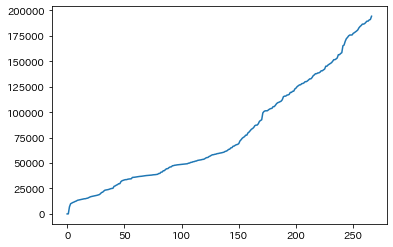

In [28]:
y = (df_train[df_train.game_session=='0848ef14a8dc6892'].game_time)
x = range(len(y))
plt.plot(x,y)

## Check set of *Title, world and type* is unique to set of *install_id and session*

In [29]:

df_user_game_settting_validation = df_train.drop(ls_col_time,axis=1)[['installation_id','game_session','title','world','type']].groupby(['installation_id','game_session'],as_index=True,sort=False).agg(agg_func_game_settting_validation)
#All col is 1 . it means VALIDATED 
df_user_game_settting_validation.mean()

title    1.0
world    1.0
type     1.0
dtype: float64

## Check *session and type, world*

In [32]:
# use df_train_not_start
# df_game_session_type  = make_df_group(df_train_not_start,['installation_id','game_session','type' ],agg_func_game_session_validation)
# df_game_session_world = make_df_group(df_train_not_start,['installation_id','game_session','world'],agg_func_game_session_validation)

df_game_session_world_type = make_df_group(df_train_not_start,['installation_id','game_session','world','type'],agg_func_game_session_validation)

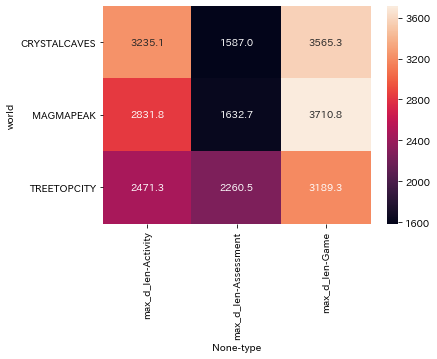

In [48]:
sns.heatmap(df_game_session_world_type.pivot_table(index='world',columns=['type'],values='game_time',aggfunc='mean'),annot=True, fmt="1.1f")

### Check sequence to Asseement

In [63]:

df_train_install_num = (df_train_not_start.pivot_table(index='installation_id',values='game_session',aggfunc=len)).sort_values(by='game_session',ascending=False)


つぎは各install idにおける受講したもののの流れを見る。
level を見てもいいかもね


## Making feature for ML

In [79]:
obj_uid = df_train.groupby('installation_id')
# Check each obj
for uid, obj in obj_uid:
    make_user_feature(obj)
    break

0              NONE
1         MAGMAPEAK
2         MAGMAPEAK
3         MAGMAPEAK
4         MAGMAPEAK
           ...     
1352      MAGMAPEAK
1353      MAGMAPEAK
1354      MAGMAPEAK
1355    TREETOPCITY
1356    TREETOPCITY
Name: world, Length: 1357, dtype: object
{'inst_id': '0001e90f', 'world': 'NONE'}


In [78]:
def make_user_feature(obj_uid):

    dct_usr = {}

    # set meta infomation
    # dupilicated data is ignored. Only use one
    ほんとに？ゆにーくでいいの？
    dct_usr['inst_id'] = obj_uid['installation_id'].unique()[0]
    dct_usr['world'] = obj_uid['world'].unique()[0]
    print(obj_uid['world'])

    
    print(dct_usr)

In [68]:
obj_uid

KeyError: 'Column not found: 0'

### *Convert Title* and 

Titile ans words have few kind of unique count.


*https://www.kaggle.com/artgor/oop-approach-to-fe-and-models*

In [29]:
df_train.event_data

0                      {"event_code": 2000, "event_count": 1}
1                      {"event_code": 2000, "event_count": 1}
2           {"version":"1.0","event_count":1,"game_time":0...
3           {"description":"Let's build a sandcastle! Firs...
4           {"description":"Let's build a sandcastle! Firs...
                                  ...                        
11341037    {"description":"Tap another dinosaur.","identi...
11341038               {"event_code": 2000, "event_count": 1}
11341039               {"event_code": 2000, "event_count": 1}
11341040               {"event_code": 2000, "event_count": 1}
11341041               {"event_code": 2000, "event_count": 1}
Name: event_data, Length: 11341042, dtype: object

In [42]:
def save_pickle(filename,obj):
    path_folder = '../pickle/'
    with open(path_folder+filename+'.pickle','wb') as f:
        pickle.dump(obj,f)

In [43]:
save_pickle('df_train',df_train)
save_pickle('df_spec',df_spec)

OSError: [Errno 22] Invalid argument

In [ ]:
df_train_labels